In [1]:

import pandas as pd

#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

#데이터 scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할:train, test
from sklearn.model_selection import train_test_split
#분류 SVM
from sklearn.svm import SVC
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
#모델 성능 평가
from sklearn.metrics import confusion_matrix

In [14]:
df_raw = pd.read_csv('./HMEQ.csv',encoding='cp949')
df_raw

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808717,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [15]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [16]:
# pandas 잘하시는분.. 이거 평균값, 최빈값끼리 묶어서 한번에 처리하는법 알려주세요 ㅎㅎ

df_raw['VALUE'].fillna(df_raw['VALUE'].mean(),inplace=True)
df_raw['CLAGE'].fillna(df_raw['CLAGE'].mean(),inplace=True)
df_raw['YOJ'].fillna(int(df_raw['YOJ'].mode()[0]),inplace=True)
df_raw['DELINQ'].fillna(int(df_raw['DELINQ'].mode()[0]),inplace=True)
df_raw['NINQ'].fillna(int(df_raw['NINQ'].mode()[0]),inplace=True)

In [17]:
df_raw.isnull().sum(axis=0)

BAD         0
LOAN        0
MORTDUE     0
VALUE       0
REASON      0
JOB        81
YOJ         0
DEROG       0
DELINQ      0
CLAGE       0
NINQ        0
CLNO        0
DEBTINC     0
dtype: int64

In [18]:
df_dummy=pd.get_dummies(df_raw)
df_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [19]:
df_dummy.isnull().sum(axis=0)

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [24]:
df_raw_y = df_dummy['BAD']
df_raw_x = df_dummy.drop("BAD",axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,
                                                             df_raw_y,test_size=0.3,
                                                             random_state=1234)
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.908
Accuracy on test set: 0.908


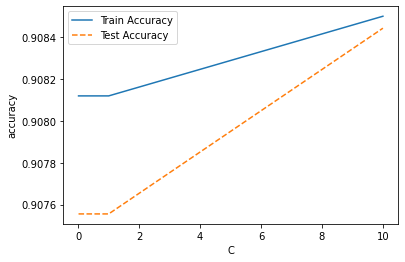

In [26]:

#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#c: 규제(0.01, 0.1, 1, 10)
para_c = [10 **c for c in range(-2, 2)]


for v_C in para_c:
    svm = SVC( C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    

df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy


df_accuracy_c.round(3)
# Gamma별 정확도 그래프로 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel('C')
plt.legend()




In [30]:

#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
#c: 규제(0.01, 0.1, 1, 10)
para_gamma = [10 **gamma for gamma in range(-2, 2)]


for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy


df_accuracy_gamma.round(3)
# Gamma별 정확도 그래프로 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()




NameError: name 'df_scaled_train_x' is not defined

In [4]:

v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0,3,random_state = 1234)
print("train data X size : 0".format(df_scaled_train_x.shape))
print("test data X size : 0".format(df_scaled_test_x.shape))

svm = SVC(C = v_C, random_state = 1234)
svm.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f)".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_testy)))


train_accuracy = []; test_accuracy = []
para_c = [10 **c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))


df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
               

df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

df_accuracy_c.round(3)   

bit.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
PIL.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()




SyntaxError: positional argument follows keyword argument (<ipython-input-4-b586d5bc0d11>, line 8)